# Project: St. Maarten Price Data Prediction 

<p>Project Description: A project to explore St. Maarten's CPI product price data create visualizations of the data and use predictive modelling on the data.</p>

## Data Loading & Package Setup

In [161]:
# Importing required libbrairies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [162]:
# Loading titanic data set & intial preview. 
# Create Dirty multi-machine file path loads.
M_PATH = ['/home/m0linux/Documents/projects/St.Maarten_CPI_Product_Price_Forecast/data/cpi_sxm _2001_2016.csv']
df = pd.read_csv( M_PATH[0], sep = ';')

### Data transformations

In [163]:
# Missing Values Check
display(df.isnull().sum())

Expenditure category    0
2000                    0
2001                    0
2002                    0
2003                    0
2004                    0
2005                    0
2006                    0
2007                    0
2008                    0
2009                    0
2010                    0
2011                    0
2012                    0
2013                    0
2014                    0
2015                    0
2016                    0
2017                    0
dtype: int64

In [164]:
# Drop Data Classifiers and Totals
df_drop_classif = df.drop(index= [0,1,11,14,17,23,31,33,38,44] )
df_drop_classif_column = df_drop_classif.drop(columns= ['Expenditure category'] )

In [165]:

# Replace ',' for '.' allowing objects to be converted to numeric-float values
columns = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012', '2013','2014','2015','2016','2017']
columns_b = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012', '2013','2014','2015','2016','2017']

# Replace currency "," --> '.' for conversion to float data type
for col in columns:
    df_drop_classif_column[col] = df_drop_classif_column[col].str.replace(',','.')
    df_drop_classif_column[col] = df_drop_classif_column[col].astype(float)

for col_b in columns_b:
    df_drop_classif[col_b] = df_drop_classif[col_b].str.replace(',','.')
    df_drop_classif[col_b] = df_drop_classif[col_b].astype(float)
    

df = df_drop_classif_column

In [166]:
from sklearn.preprocessing import StandardScaler

## Exploratory Data Analysis

#### Data Overview & Statistical Summary

In [167]:
# Descriptive summary, sata types and data column and feature count using shape.
# Data Type Check
display(df.dtypes)

# Data Shape Check
display(df.shape)

# Statistical Overview Check
display(df.describe())


2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
dtype: object

(38, 18)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,91.352105,92.104474,92.302368,93.426316,94.658158,97.533421,99.706053,101.836842,108.015789,111.712895,114.303684,120.231053,128.246053,135.185789,138.581842,145.376053,142.385526,146.065526
std,11.093785,10.583208,8.502278,7.403602,6.347285,4.178342,2.284645,3.745731,9.798222,11.776113,13.722210,21.298255,28.467594,43.968323,47.888182,53.721036,53.226417,57.048060
min,68.090000,70.440000,75.270000,76.960000,79.120000,82.660000,93.740000,99.000000,96.560000,96.860000,96.330000,72.780000,71.500000,71.500000,71.500000,71.500000,71.500000,71.500000
25%,83.825000,85.687500,86.135000,88.772500,91.112500,95.107500,99.130000,100.000000,101.635000,102.542500,103.892500,104.405000,109.445000,109.820000,110.957500,112.395000,107.350000,108.350000
50%,92.130000,93.400000,94.995000,95.605000,96.910000,98.675000,99.940000,100.750000,105.225000,108.550000,109.530000,115.815000,120.855000,123.215000,124.235000,128.840000,124.340000,127.890000
75%,99.925000,99.910000,99.602500,99.715000,100.000000,100.000000,100.000000,101.700000,111.962500,117.575000,123.142500,129.840000,143.982500,148.152500,153.647500,162.785000,167.327500,174.852500
max,114.810000,114.490000,104.210000,104.200000,104.250000,109.550000,110.920000,118.800000,143.560000,149.580000,147.790000,171.080000,206.580000,338.750000,354.830000,354.820000,362.210000,371.470000


####  Outlier Detection & Removal

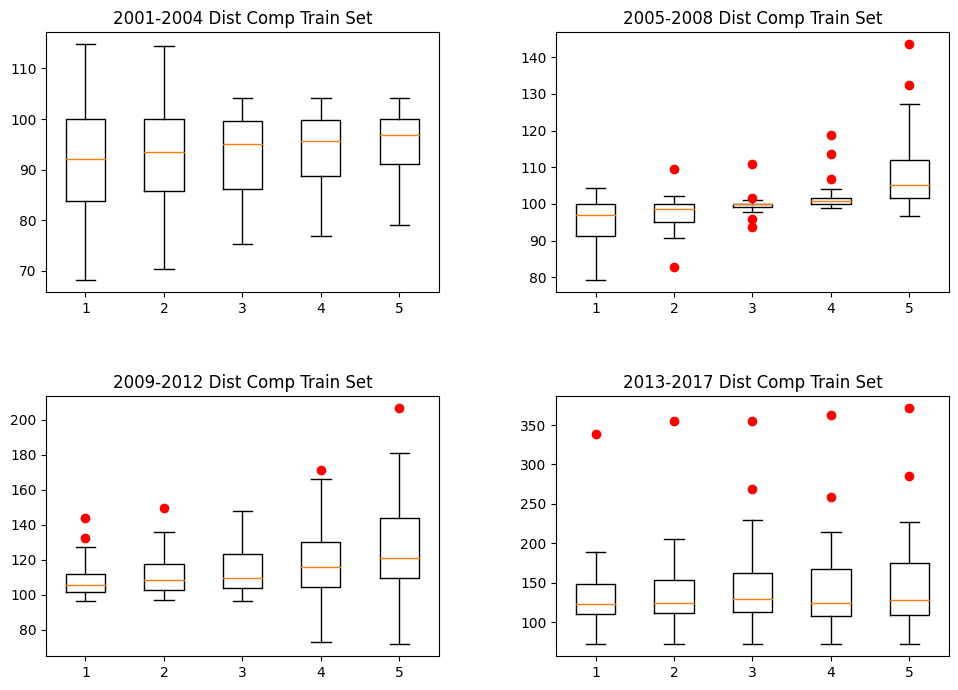

In [168]:
# Outlier Visual Detection
fig, axs = plt.subplots(2,2)

axs[0,0].set_title('2001-2004 Dist Comp Train Set')
axs[0,0].boxplot(df[['2000','2001','2002','2003','2004']],0,'r')

axs[0,1].set_title('2005-2008 Dist Comp Train Set')
axs[0,1].boxplot(df[['2004','2005','2006','2007','2008']],0,'r')

axs[1,0].set_title('2009-2012 Dist Comp Train Set')
axs[1,0].boxplot(df[['2008','2009','2010','2011','2012']],0,'r')

axs[1,1].set_title('2013-2017 Dist Comp Train Set')
axs[1,1].boxplot(df[['2013','2014','2015','2016','2017']],0,'r')


fig.subplots_adjust(left=0.09, right=1.5, bottom=0.1, top= 1.4, hspace=0.4, wspace= 0.3)


plt.show()

##### IQR Filtering


In [169]:
# Interquarentile Range (IQR) Based Filtering

percentile25 = df.quantile(0.25)
percentile75 = df.quantile(0.75)

iqr = percentile75 - percentile25

upper_limits = percentile75 + 1.5 * iqr
lower_limits = percentile25 - 1.5 * iqr

# Linear Interpolation for missing data (Outliers)
data_no_outliers = df[(df >= lower_limits) & (df <= upper_limits)]
data_no_outliers_interp = data_no_outliers.interpolate(method='linear', order= 2)

# Missing Values Check
display(data_no_outliers_interp.isnull().sum())



2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
dtype: int64

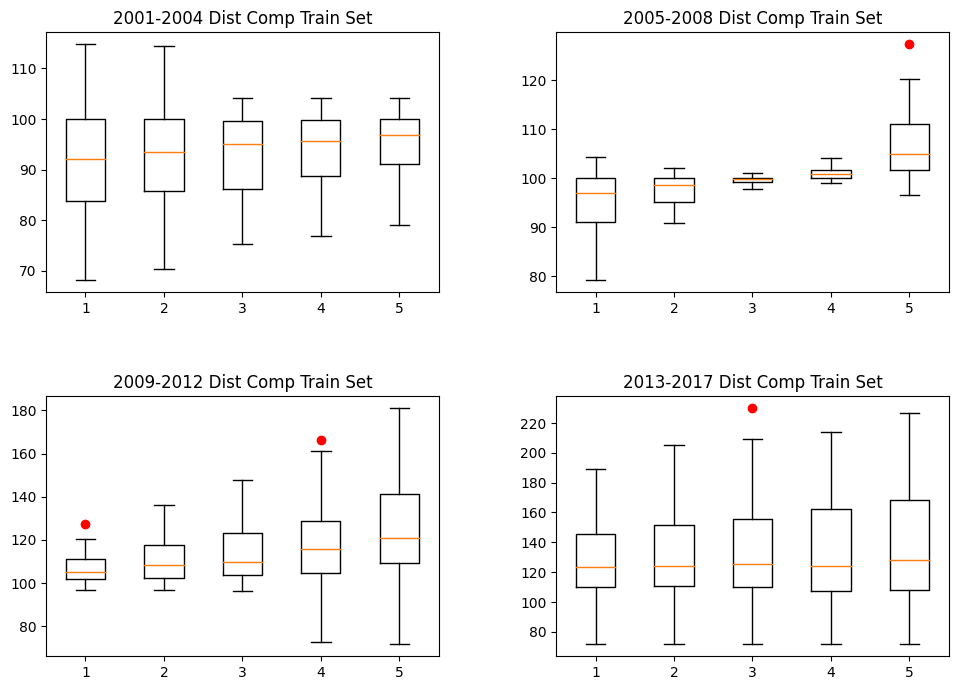

In [170]:
# Outliers Removed Comp

fig1, axs1 = plt.subplots(2,2)

axs1[0,0].set_title('2001-2004 Dist Comp Train Set')
axs1[0,0].boxplot(data_no_outliers_interp[['2000','2001','2002','2003','2004']],0,'r')
axs1[0,1].set_title('2005-2008 Dist Comp Train Set')
axs1[0,1].boxplot(data_no_outliers_interp[['2004','2005','2006','2007','2008']],0,'r')
axs1[1,0].set_title('2009-2012 Dist Comp Train Set')
axs1[1,0].boxplot(data_no_outliers_interp[['2008','2009','2010','2011','2012']],0,'r')
axs1[1,1].set_title('2013-2017 Dist Comp Train Set')
axs1[1,1].boxplot(data_no_outliers_interp[['2013','2014','2015','2016','2017']],0,'r')


fig1.subplots_adjust(left=0.09, right=1.5, bottom=0.1, top= 1.4, hspace=0.4, wspace= 0.3)


plt.show()

## Data Transformations

In [171]:
# Datasets for Creating clean data set files /data/dataset - Reminder* Full dataset variable = "data_no_outliers_interp" 
sxmppd_train = data_no_outliers_interp[['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012', '2013','2014']]
sxmppd_test  = data_no_outliers_interp[['2015','2016','2017']]

# Working Data Sets - Scikit learn Models
df_train = data_no_outliers_interp[['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012', '2013','2014']]
df_test = data_no_outliers_interp[['2015','2016','2017']]


# Export data to sys directory
# sxmppd_train.to_csv('/home/m0linux/Documents/computer_science/Data Science Engineering/sxm price data prediction/data/dataset/sxmppd_train.csv', index=False, header= True,)
# sxmppd_test.to_csv('/home/m0linux/Documents/computer_science/Data Science Engineering/sxm price data prediction/data/dataset/sxmppd_test.csv', index=False, header= True)

## Machine Learning Models

In [172]:
# Importing packages for splitting data for training and evaluations
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [173]:
# Split and Shuffle tain and test data sets

X = df_train.drop(columns=['2014'])
y = df_train['2014']

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.25, shuffle=False, stratify=None, random_state= None)


#### Data Scaling 

In [174]:
from sklearn.preprocessing import StandardScaler

##### StandardScaler Data 

In [175]:
scaler = StandardScaler()
scaler.fit(X_train)

#display(scaler.mean_)
#display(scaler.scale_)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


#display(X_scaled.mean(axis=0))
#display(X_scaled.std(axis = 0))


#### Scikit-learn Modeling Algorithms

In [176]:
# Instantiate the random SVR model 
from sklearn.svm import LinearSVR
from sklearn.svm import SVR


##### Support Vector Machine SVR

In [177]:
lin_model = LinearSVR()
lin_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [178]:
# Cross Validation with skit test set
y_pred = lin_model.predict(X_test)
print(y_pred)
print('LinearSVR Trainig Score: {:2f}'.format(lin_model.score(X_train, y_train)))
print('LinearSVR Test Score: {:2f}'.format(lin_model.score(X_test, y_test)))

[ 99.14347221  95.12422959 101.11580559 121.46817955 125.14961234
 110.54485439  65.74055116 113.86985651 104.70914787 134.16496105]
LinearSVR Trainig Score: 0.986329
LinearSVR Test Score: 0.960836


##### Linear Algorithms 


In [179]:
# Importing Linear model packages
from sklearn import linear_model

###### Ridge Regression

In [180]:
# Instantiate the Linear Model 
rr = linear_model.Ridge(alpha=0.5)
rr.fit(X_train_scaled,y_train)

Ridge(alpha=0.5)

In [181]:
# exavualting with Ridge Regression
y_pred = rr.predict(X_test_scaled)
print('LinearSVR Trainig Score: {:2f}'.format(rr.score(X_train_scaled, y_train)))
print('Ridge Regression Test Score: {:2f}'.format(rr.score(X_test_scaled, y_test)))

LinearSVR Trainig Score: 0.985465
Ridge Regression Test Score: 0.962997


###### Lasso Regression

In [182]:
lr = linear_model.Lasso()
lr.fit(X_train_scaled,y_train)

Lasso()

In [183]:
# exavualting with Ordinary least Squares 
y_pred_lasso = lr.predict(X_test_scaled)        
print('lr Trainig Score: {:2f}'.format(lr.score(X_train_scaled, y_train)))
print('lr Test Score: {:2f}'.format(lr.score(X_test_scaled, y_test)))

lr Trainig Score: 0.982244
lr Test Score: 0.969551


##### Results

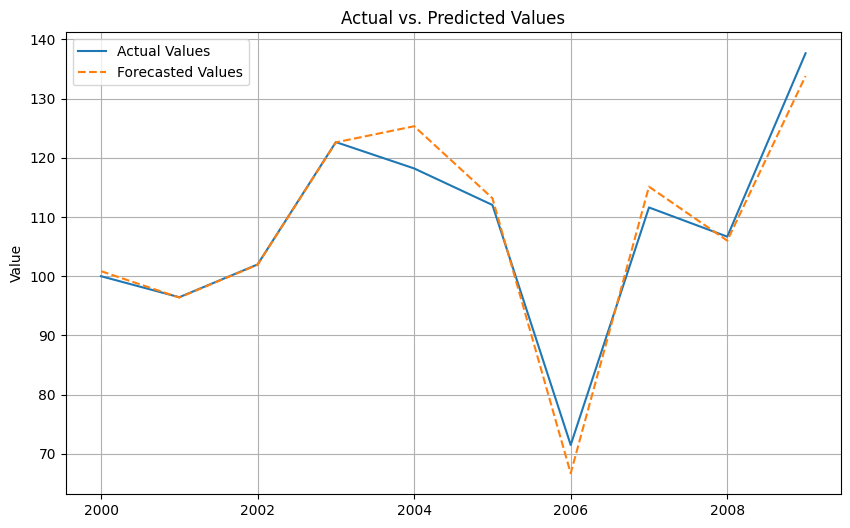

In [184]:
# Support Vector Algorithm Comparison Results

years = range(2000, 2000 + len(X_test))  # Assuming the data starts from 2018

plt.figure(figsize=(10, 6))
plt.plot(years, y_test, label='Actual Values')
plt.plot(years, y_pred, label='Forecasted Values', linestyle='dashed')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()